# Final Project 

## Group Name: The Neighborhood Hunters (Shresta Kalla and Nishka Abraham)

## Introduction

**Data sets used:** \
Crime Frequency: https://data.wprdc.org/dataset/police-incident-blotter \
Population: https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv \
Fire Incidents: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh \
Asthma: https://data.wprdc.org/dataset/childhood-asthma-healthcare-utilization/resource/61022ad9-c601-4152-9ba6-da915fd05be5 \
2010 Census: https://data.wprdc.org/dataset/2010-census-tracts/resource/a8d73d14-dc00-4f8c-807b-550d499f4762z \
\
When deciding which neighborhood in Pittsburgh is the best, we focused on three different factors. The factors were crime rate, fire incidents and asthma rate. The first factor we looked at was crime rate. This factor allowed us to see how safe each neighborhood was. Then we looked at fire incidents where we calculated the total number of fire incidents per neighborhood. Lastly, we looked at asthma rates because these offer insights into air quality within each neighborhood. Using these factors we were able to determine the best neighborhood by looking for the neighborhood with a low crime rate, total fire incidents and asthma rate.


# Data

In [37]:
import pandas as pd

## Asthma Rate 

In [47]:
# Reading file

asthma = pd.read_csv("pittAsthma.csv")
asthma.head()


,Census_tract,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members
0,42003010300,2,0,0,6,83
1,42003020100,32,19,3,223,2114
2,42003020300,0,0,0,2,48
3,42003030500,11,3,3,61,422
4,42003040200,2,1,1,18,138


In [48]:
# Organizing file to contain only necessary columns and sorting 

asthma = asthma.rename(columns = {'Census_tract':'geoid10'})
asthma = asthma.sort_values(by=['geoid10'])
asthma = asthma.drop(columns = ['ED_visits', 'ED_hosp', 'UC_visits'])
asthma.head(8)

,geoid10,Asthma_use,Total_members
0,42003010300,6,83
1,42003020100,223,2114
2,42003020300,2,48
3,42003030500,61,422
4,42003040200,18,138
5,42003040400,1,17
6,42003040500,3,44
7,42003040600,0,15


In [49]:
# Reading file

census = pd.read_csv("census.csv")
census = census[['geoid10', 'hood', 'blkgrpce10']]
census['geoid10'] = census['geoid10'] - census['blkgrpce10'] 
census = census.sort_values(by=['geoid10'])
census['geoid10'] = census['geoid10']/10
census

,geoid10,hood,blkgrpce10
63,4.200301e+10,Bluff,3
25,4.200301e+10,Bluff,2
26,4.200301e+10,Bluff,1
88,4.200301e+10,Bluff,4
6,4.200302e+10,Central Business District,4
...,...,...,...
15,4.200398e+10,Central Lawrenceville,1
73,4.200398e+10,Point Breeze,1
169,4.200398e+10,North Shore,1
65,4.200398e+10,Lincoln-Lemington-Belmar,1


In [50]:
# Creating two DataFrames

df = pd.DataFrame(census)
df2 = pd.DataFrame(asthma)
df.dropna()
df = df.reset_index(drop=True)

In [51]:
# Merging to form one combined DataFrame

df3 = df2.merge(df, on = 'geoid10', how = 'left')
df3.head(10)

,geoid10,Asthma_use,Total_members,hood,blkgrpce10
0,42003010300,6,83,Bluff,3.0
1,42003010300,6,83,Bluff,2.0
2,42003010300,6,83,Bluff,1.0
3,42003010300,6,83,Bluff,4.0
4,42003020100,223,2114,Central Business District,4.0
5,42003020100,223,2114,Central Business District,6.0
6,42003020100,223,2114,Central Business District,5.0
7,42003020100,223,2114,Central Business District,1.0
8,42003020100,223,2114,Central Business District,2.0
9,42003020100,223,2114,Central Business District,3.0


In [52]:
Asthma_rate = df3['Asthma_use'] / df3['Total_members']
df3['Asthma_rate'] = Asthma_rate
df3 = df3.sort_values(by=['Asthma_rate'])
df3.dropna()
df4 = df3.head(20)
df4

,geoid10,Asthma_use,Total_members,hood,blkgrpce10,Asthma_rate
619,42003982200,0,34,North Oakland,1.0,0.000000
617,42003981000,0,8,Central Lawrenceville,1.0,0.000000
615,42003980600,0,5,Chateau,1.0,0.000000
612,42003980300,0,4,Squirrel Hill South,1.0,0.000000
610,42003980000,0,1,Lincoln-Lemington-Belmar,1.0,0.000000
19,42003040600,0,15,Central Oakland,1.0,0.000000
618,42003981800,0,13,Lincoln-Lemington-Belmar,1.0,0.000000
173,42003170600,3,100,South Side Slopes,2.0,0.030000
174,42003170600,3,100,South Side Slopes,3.0,0.030000
172,42003170600,3,100,South Side Slopes,1.0,0.030000


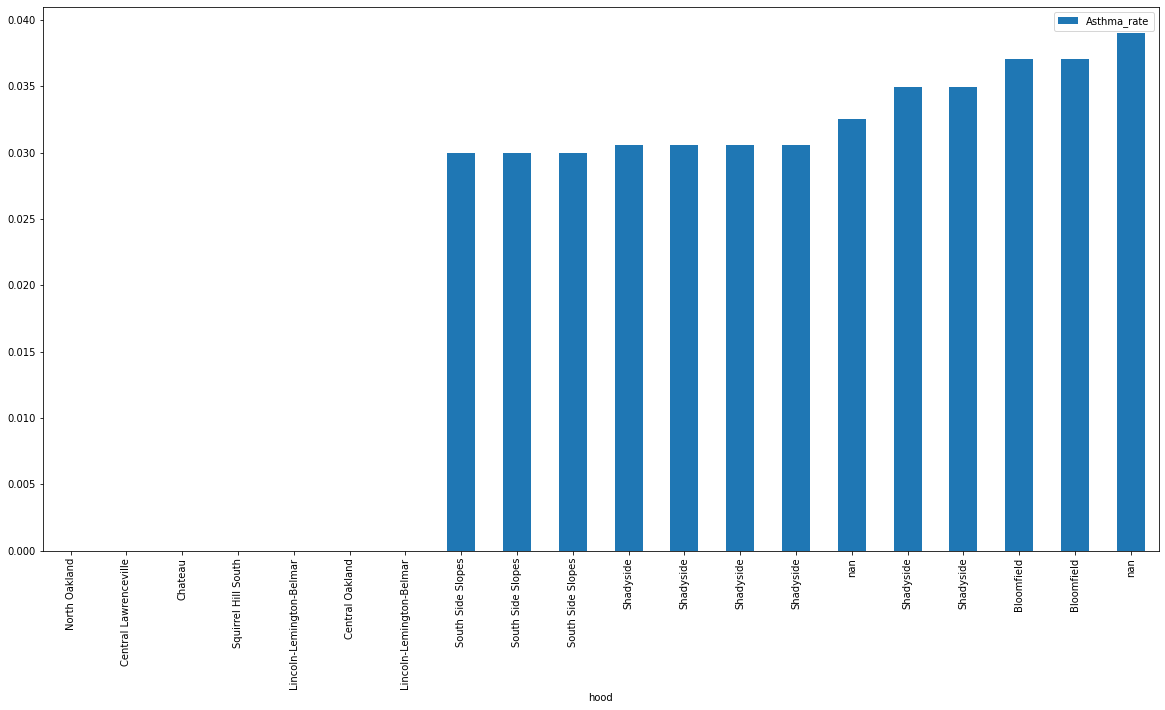

In [16]:
# Graphing the asthma rate

df4.plot.bar(x = 'hood', y='Asthma_rate', figsize = (20,10))

## Crime Rate

In [32]:
#Read the file
crime = pd.read_csv("crime.csv")

#Calculated the number of crimes that occured in each neighborhood and displayed it in ascending order
crime_frequency = crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
crime_frequency

St. Clair                      1
New Homestead                  1
Mt. Oliver Boro                2
Outside County                 2
Oakwood                        2
                            ... 
Homewood South                80
East Liberty                  81
Carrick                      111
South Side Flats             124
Central Business District    210
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

Text(0, 0.5, 'Crimes Committed')

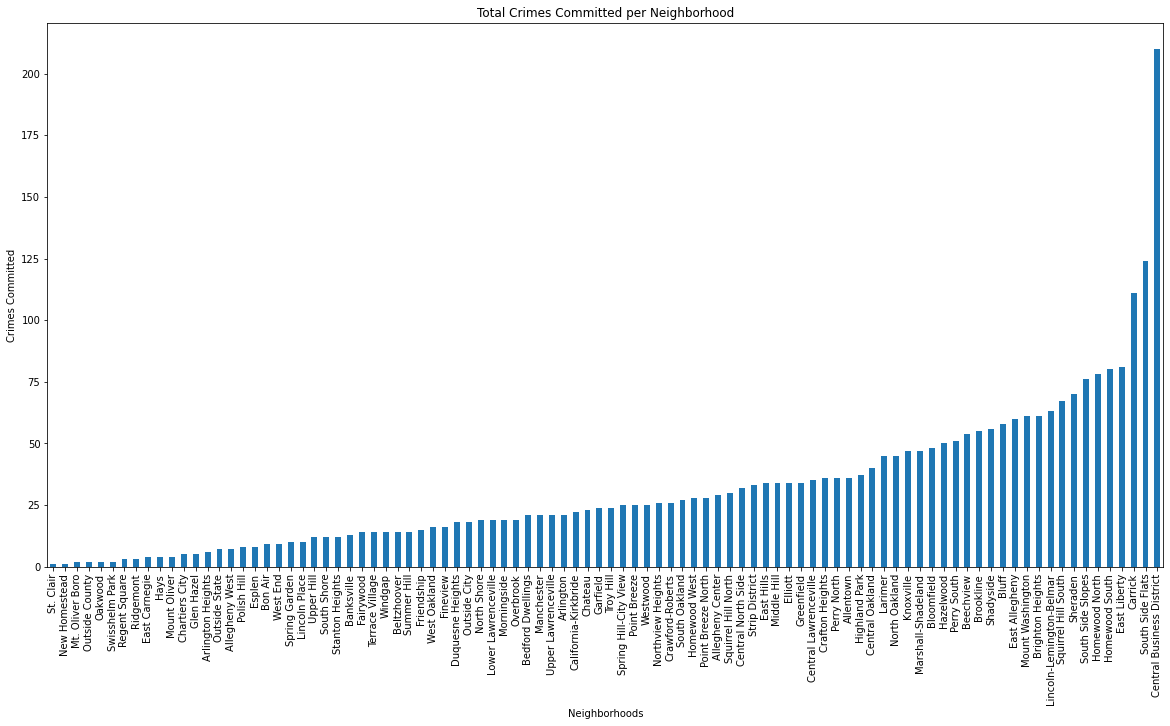

In [18]:
#Graphed the total number of crimes in each neighborhood
cf_graph = crime_frequency.plot(kind = "bar", title = "Total Crimes Committed per Neighborhood", figsize = (20,10))
cf_graph.set_xlabel("Neighborhoods", fontsize = 10)
cf_graph.set_ylabel("Crimes Committed", fontsize = 10)

In [34]:
#Uploaded and read the population data
population = pd.read_csv("population.csv")

#Found the population per neighborhood
total_population = population[["Neighborhood" , "Estimate; Total"]]
total_population = total_population.rename(columns = {'Neighborhood': 'INCIDENTNEIGHBORHOOD','Estimate; Total': 'Population'})


#Sorted the crime dataset in ascending order again and dropped the neighborhoods that were not in the population dataset
crime_neighborhood = crime.groupby("INCIDENTNEIGHBORHOOD").count()
crime_neighborhood = crime_neighborhood[["INCIDENTLOCATION"]]
crime_neighborhood = crime_neighborhood.rename(columns = {'INCIDENTLOCATION': 'Crimes Committed'})
crime_neighborhood = crime_neighborhood.sort_values(by = ['Crimes Committed'])
crime_neighborhood = crime_neighborhood.drop(["Central North Side", "Mount Oliver", "Mt. Oliver Boro", "Outside City",
                                               "Outside County","Outside State", "South Shore", "Chateau"])


#Merged the two datasets using a common column(INCIDENTNEIGHBORHOOD)
df1 = pd.DataFrame(total_population)
df2 = pd.DataFrame(crime_neighborhood)
df3 = df2.merge(df1, on = 'INCIDENTNEIGHBORHOOD', how = 'left')


#Calculated the crime rate and displayed it in ascending order
df3["Crime Rate"] = (df3["Crimes Committed"] / df3["Population"]) * 100
df3 = df3.sort_values(by = ['Crime Rate'])
df3.reset_index(drop = True, inplace = True)
df3

,INCIDENTNEIGHBORHOOD,Crimes Committed,Population,Crime Rate
0,New Homestead,1,973,0.102775
1,Swisshelm Park,2,1345,0.148699
2,Oakwood,2,1058,0.189036
3,Stanton Heights,12,4761,0.252048
4,Squirrel Hill North,30,11336,0.264644
...,...,...,...,...
81,Homewood South,80,2276,3.514938
82,West End,9,235,3.829787
83,Strip District,33,747,4.417671
84,Central Business District,210,4060,5.172414


**Metric: The lower the crime rate the better the neighborhood** \
0 = most safest(best neighborhood) \
10 = most dangerous

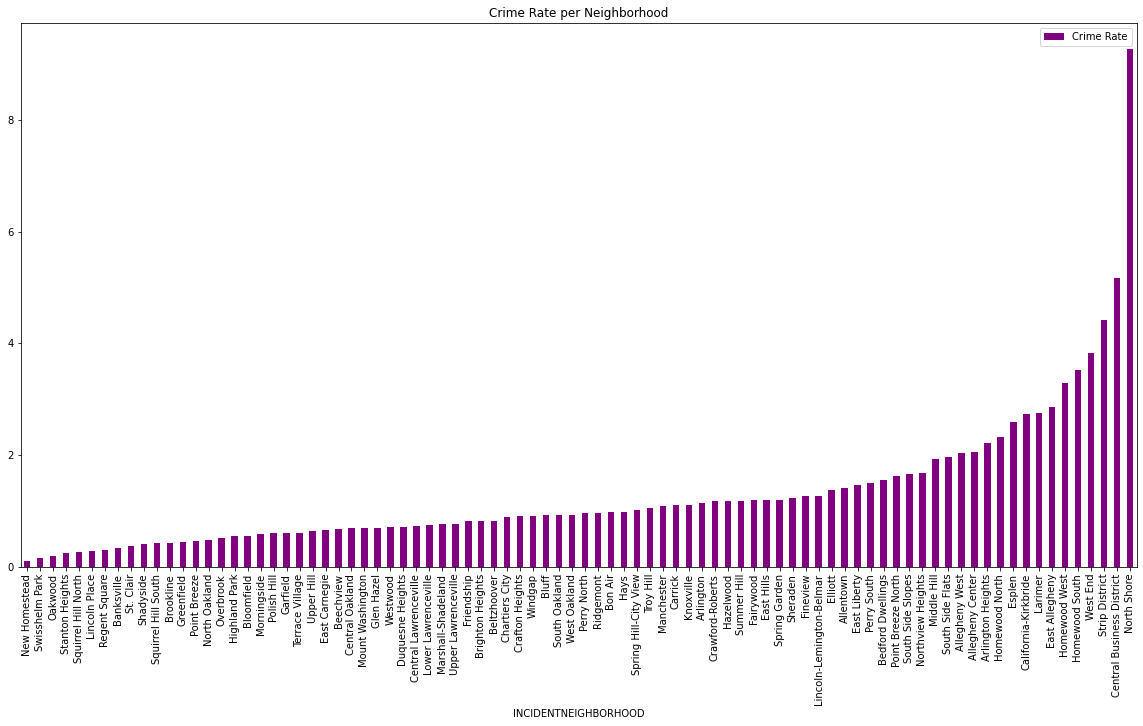

In [20]:
#Graphed the crime rate per neighborhood
cr_graph = df3[["INCIDENTNEIGHBORHOOD","Crime Rate"]]
cr_graph = cr_graph.set_index("INCIDENTNEIGHBORHOOD")
cr_graph.plot(kind = "bar", title = "Crime Rate per Neighborhood", figsize = (20,10), color = "purple")

### Conclusion

Best Neighborhood: New Homestead

It had the lowest crime rate compared to all the other neighborhoods making it the safest

## Fire Incidents

In [21]:
#Read the file
fire_incidents = pd.read_csv("fire_incidents.csv")

#Calculated the total number of fires per neighborhood
total_fires = fire_incidents.groupby("neighborhood").sum()
total_fires = total_fires[[ "alarms"]]

#Displayed the total number of fires per neighborhood in ascending order
total_fires = pd.DataFrame(total_fires)
total_fires = total_fires.sort_values(by = ['alarms'])
total_fires.reset_index(inplace = True)
total_fires

,neighborhood,alarms
0,Ridgemont,1
1,Mount Oliver Borough,2
2,New Homestead,2
3,Hays,3
4,Regent Square,3
...,...,...
86,Squirrel Hill South,117
87,South Side Flats,117
88,Lincoln-Lemington-Belmar,117
89,Central Business District,149


**Metric: The lower the number of alarms the better the neighborhood** \
Less alarms = less fire incidents = best neighborhood \
More alarms = most fire incidents

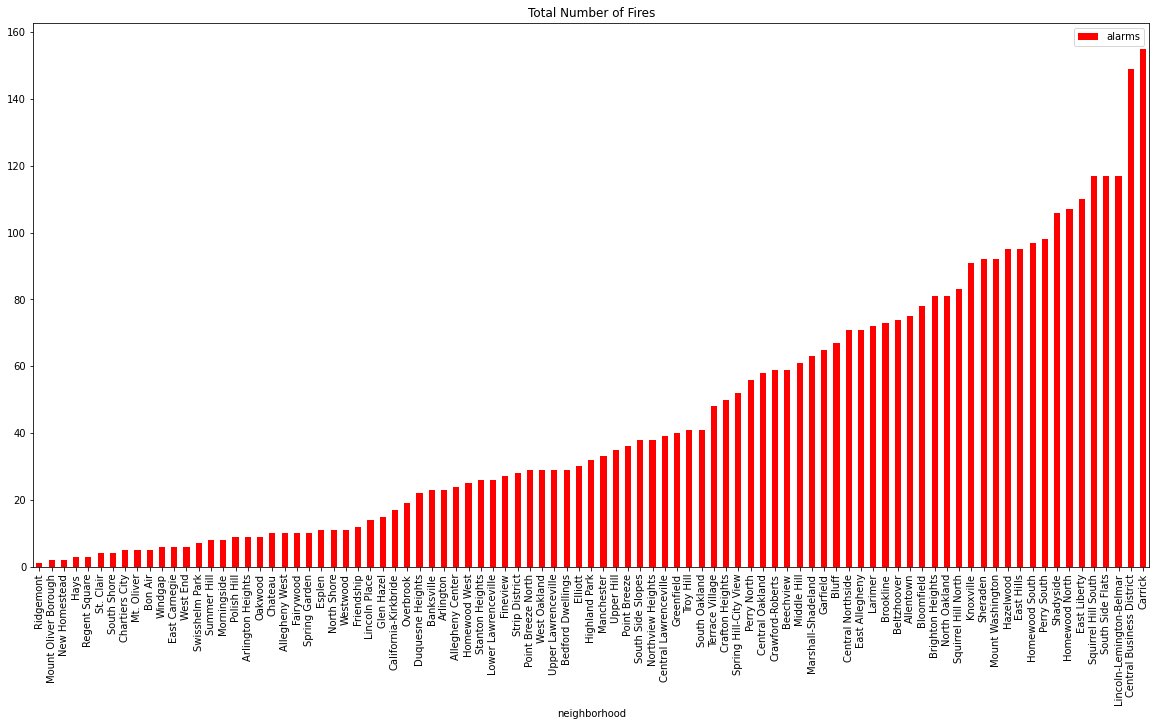

In [22]:
#Graphed the total number of fires based on alarms per a neighborhood
tf_graph = total_fires[["neighborhood", "alarms"]]
tf_graph = tf_graph.set_index("neighborhood")
tf_graph.plot(kind = "bar", title = "Total Number of Fires", figsize = (20,10), color = "red")

### Conclusion

Best Neighborhood: Ridgemont

It had the least amount of fire incidents compared to all the other neighborhoods.

# Combining the Metrics

We ranked the factors in order of importance. We felt that crime rate was the most important factor, following asthma rate and fire incidents. Since crime rate was the most important we multiplied that by 3, the asthma rate by 2 and the total fire incidents by 1. 

In [55]:
crime_rate_average = df3['Crime Rate'].mean()
df3['Crime Rate Score'] = (df3['Crime Rate'] / crime_rate_average) * 3

fire_incidents_average = total_fires['alarms'].mean()
total_fires['Fire Incidents Score'] = (total_fires['alarms'] / fire_incidents_average) * 1
total_fires = total_fires.rename(columns = {'neighborhood': 'INCIDENTNEIGHBORHOOD'})

df3['Asthma Rate Score'] = (df3['Asthma_rate'] / df3['Asthma_rate'].mean()) * 2

#df3 = df2.merge(df1, on = 'INCIDENTNEIGHBORHOOD', how = 'left')
final = df3.merge(total_fires, on = 'INCIDENTNEIGHBORHOOD', how = 'left')
final['Final Score'] = final['Crime Rate Score'] + final['Fire Incidents Score'] + final['Asthma Rate Score']
final = final.sort_values(by = ['Final Score'])
final.reset_index(drop = True, inplace = True)
final = final.drop(columns = ["Crimes Committed", "Population", "Crime Rate", "alarms"])
final.head(10)

KeyError: 'Crime Rate'

# Conclusion

Given all of the factors we analyzed, New Homstead is one of the best neighborhoods. This is because it has the lowest score across all of the factors. Meaning that it is one of the safest given the lower levels of crime, fire incidents, and asthma. 